# Variable Selection

The purpose is to select the "best" subset of predictors.

1) We want to explain the data in the simplest way removing reduntant predictors. 
2) Unnecessary predictors will add noise to the estimation of other quantities that interested us. Degree of freedom will be wasted
3) Collinearity is caused by having too many variables trying to do the same ob
4) If model will be used for prediction, we can save time and money by not measuring redundant predictors

* Outliers and transformation can have important consequences on the model selected. Iteration and experimentation is necessary to find better models

There are two main types of variable selection

\begin{split}
Types \:of\: selection
\begin{cases}
 \text{ Stepwise approach} \\      
  \text{ Criterion approach}
\end{cases}
\end{split}

## Hierarchical Models

* Some models have an natural hierarchy. For instance, $x^2$ is a higher order term than $x$. When selecting terms, lower term should not be removed before higher order terms
* We should not remove interaction terms $x_1x_2$ before removing $x_1$ and $x_2$ simultaneously. By removing $x_1x_2$ and the single terms $x_1$ and $x_2$, we would be back to the linear base model 


## Testing-Based Procedures
### Backward Elimination
* This is the simplest way of all variable selection procedures
* Situations where there is a complex hierarchy, backward elimination can be run manually 
* We start will all predictors in the model and then remove the predictor with highest p-values greater than $\alpha_{crit}$. Refit the model and remove the next highest. The procedure will be repeated until no sinignificant predictor will be removed
* $\alpha_{crit}$ is called "p-to-remove". If the prediction performance is the goal, then a 15 to 20% cutoff may work best

### Forward Selection

* It is just the reverse of the backward method. We start with no variables in the model and then for all predictors not in the model we check their p-value they are added to the model

### Stepwise Regression

* Combination of backward elimination and forward selection
* allow variables to be brought back to model for new combinations

### Verdict on Testing-Base Methods

Some drawbacks:

1) "one-at-a-time" adding/dropping variables can possible miss the optimal model

2) p-values used should not be treated too literally. Too much multiple testing occuring 

3) Not direct linked to the final goal of the model (prediction or explanation). Dropped variables can still explain the phenomenon and the ones that stay have lower p-values

4) Stepwise variable selection tends to pick models that are smaller than desirable for prediction purposes

   - The interpretation should be: the dropped variables do not provide any additional information beyond the variables that stayed in the model




In [1]:
library(faraway)

In [3]:
data(state)
statedata = data.frame(state.x77, row.names=state.abb)
g = lm(Life.Exp ~., data = statedata)
summary(g)


Call:
lm(formula = Life.Exp ~ ., data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48895 -0.51232 -0.02747  0.57002  1.49447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.094e+01  1.748e+00  40.586  < 2e-16 ***
Population   5.180e-05  2.919e-05   1.775   0.0832 .  
Income      -2.180e-05  2.444e-04  -0.089   0.9293    
Illiteracy   3.382e-02  3.663e-01   0.092   0.9269    
Murder      -3.011e-01  4.662e-02  -6.459 8.68e-08 ***
HS.Grad      4.893e-02  2.332e-02   2.098   0.0420 *  
Frost       -5.735e-03  3.143e-03  -1.825   0.0752 .  
Area        -7.383e-08  1.668e-06  -0.044   0.9649    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7448 on 42 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.6922 
F-statistic: 16.74 on 7 and 42 DF,  p-value: 2.534e-10


* Backward dropping manually

In [3]:
g = update(g, . ~ . - Area)
summary(g)


Call:
lm(formula = Life.Exp ~ Population + Income + Illiteracy + Murder + 
    HS.Grad + Frost, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49047 -0.52533 -0.02546  0.57160  1.50374 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.099e+01  1.387e+00  51.165  < 2e-16 ***
Population   5.188e-05  2.879e-05   1.802   0.0785 .  
Income      -2.444e-05  2.343e-04  -0.104   0.9174    
Illiteracy   2.846e-02  3.416e-01   0.083   0.9340    
Murder      -3.018e-01  4.334e-02  -6.963 1.45e-08 ***
HS.Grad      4.847e-02  2.067e-02   2.345   0.0237 *  
Frost       -5.776e-03  2.970e-03  -1.945   0.0584 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7361 on 43 degrees of freedom
Multiple R-squared:  0.7361,	Adjusted R-squared:  0.6993 
F-statistic: 19.99 on 6 and 43 DF,  p-value: 5.362e-11


In [4]:
g = update(g, . ~ . - Population)
summary(g)


Call:
lm(formula = Life.Exp ~ Income + Illiteracy + Murder + HS.Grad + 
    Frost, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40424 -0.53182  0.07773  0.53496  1.30297 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 71.2850674  1.4124737  50.468  < 2e-16 ***
Income       0.0001133  0.0002271   0.499   0.6204    
Illiteracy  -0.1600309  0.3334357  -0.480   0.6336    
Murder      -0.2765157  0.0420412  -6.577 4.77e-08 ***
HS.Grad      0.0398761  0.0206167   1.934   0.0595 .  
Frost       -0.0076509  0.0028522  -2.682   0.0103 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7547 on 44 degrees of freedom
Multiple R-squared:  0.7162,	Adjusted R-squared:  0.684 
F-statistic: 22.21 on 5 and 44 DF,  p-value: 4.847e-11


In [5]:
summary(lm(Life.Exp ~ Illiteracy + Murder + Frost, statedata ))



Call:
lm(formula = Life.Exp ~ Illiteracy + Murder + Frost, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.59010 -0.46961  0.00394  0.57060  1.92292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.556717   0.584251 127.611  < 2e-16 ***
Illiteracy  -0.601761   0.298927  -2.013  0.04998 *  
Murder      -0.280047   0.043394  -6.454 6.03e-08 ***
Frost       -0.008691   0.002959  -2.937  0.00517 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7911 on 46 degrees of freedom
Multiple R-squared:  0.6739,	Adjusted R-squared:  0.6527 
F-statistic: 31.69 on 3 and 46 DF,  p-value: 2.915e-11


## Criterion-Based Procedures

* If we have some idea about the purpose for which a model is intended, we might propose some measure of how well a given model meets that purpose

* We could choose that model among those possible that optimizes that criterion

* Sometimes we might have too many $q$ predictors and $2^q$ possible models

We can use:
* Akaike Information Criterion (AIC): -2 max log-likelihood + 2p
* Bayes Information Criterion (BIC): -2 max log-likelihood + plog n

The goal is to minimize AIC and BIC. Large model will fit better and so have smaller residuals sum of squares (RSS), but use more parameters

#### Best model balances *fit* and *size*

* We can select based on AIC or BIC values

In [4]:
g = lm(Life.Exp ~ ., data = statedata)
step(g)

Start:  AIC=-22.18
Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + 
    Frost + Area

             Df Sum of Sq    RSS     AIC
- Area        1    0.0011 23.298 -24.182
- Income      1    0.0044 23.302 -24.175
- Illiteracy  1    0.0047 23.302 -24.174
<none>                    23.297 -22.185
- Population  1    1.7472 25.044 -20.569
- Frost       1    1.8466 25.144 -20.371
- HS.Grad     1    2.4413 25.738 -19.202
- Murder      1   23.1411 46.438  10.305

Step:  AIC=-24.18
Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + 
    Frost

             Df Sum of Sq    RSS     AIC
- Illiteracy  1    0.0038 23.302 -26.174
- Income      1    0.0059 23.304 -26.170
<none>                    23.298 -24.182
- Population  1    1.7599 25.058 -22.541
- Frost       1    2.0488 25.347 -21.968
- HS.Grad     1    2.9804 26.279 -20.163
- Murder      1   26.2721 49.570  11.569

Step:  AIC=-26.17
Life.Exp ~ Population + Income + Murder + HS.Grad + Frost

             Df Sum of Sq 


Call:
lm(formula = Life.Exp ~ Population + Murder + HS.Grad + Frost, 
    data = statedata)

Coefficients:
(Intercept)   Population       Murder      HS.Grad        Frost  
  7.103e+01    5.014e-05   -3.001e-01    4.658e-02   -5.943e-03  


*  The sequence of variable discarted is the same as in backward elimination
* The difference if that population variable was retained

##### Mallow's $C_p$ statistic

This criterion uses the average mean square error of prediction 

<p>&nbsp;</p>
\begin{split}
\frac{1}{\sigma^2} = \frac{RRS_p}{\hat \sigma^ 2} + 2p - n
\end{split}
<p>&nbsp;</p>

A model with a bad fit will have $C_p$ much bigger than $p$. The full model $C_p=p$ exactly

In [5]:
library(leaps)
b = regsubsets(Life.Exp ~ ., data = statedata)
(rs = summary(b))

Subset selection object
Call: regsubsets.formula(Life.Exp ~ ., data = statedata)
7 Variables  (and intercept)
           Forced in Forced out
Population     FALSE      FALSE
Income         FALSE      FALSE
Illiteracy     FALSE      FALSE
Murder         FALSE      FALSE
HS.Grad        FALSE      FALSE
Frost          FALSE      FALSE
Area           FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: exhaustive
         Population Income Illiteracy Murder HS.Grad Frost Area
1  ( 1 ) " "        " "    " "        "*"    " "     " "   " " 
2  ( 1 ) " "        " "    " "        "*"    "*"     " "   " " 
3  ( 1 ) " "        " "    " "        "*"    "*"     "*"   " " 
4  ( 1 ) "*"        " "    " "        "*"    "*"     "*"   " " 
5  ( 1 ) "*"        "*"    " "        "*"    "*"     "*"   " " 
6  ( 1 ) "*"        "*"    "*"        "*"    "*"     "*"   " " 
7  ( 1 ) "*"        "*"    "*"        "*"    "*"     "*"   "*" 

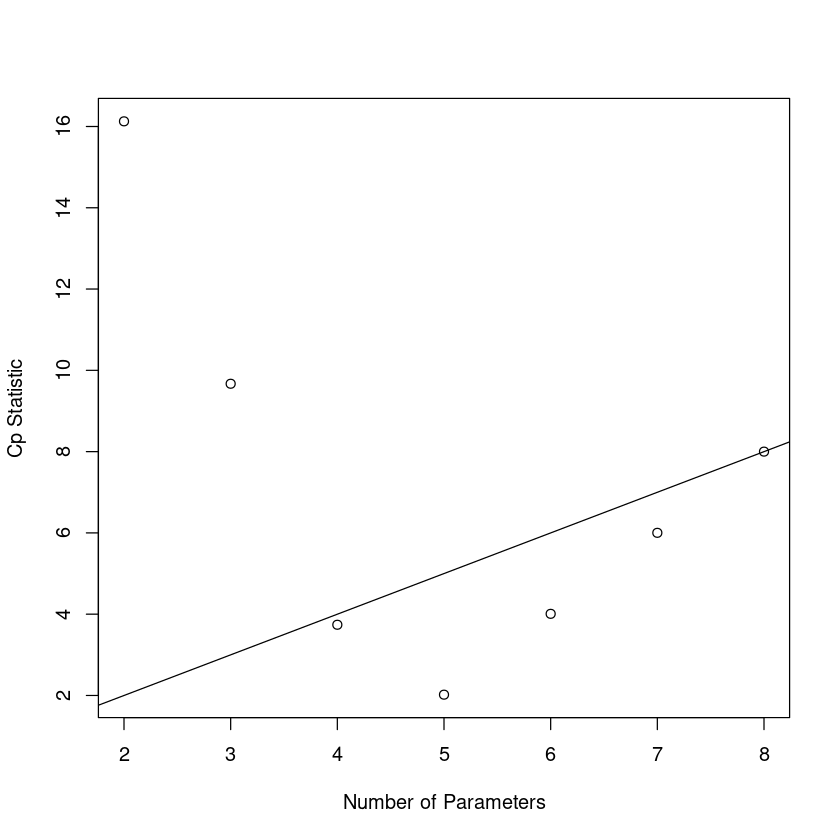

In [6]:
plot(2:8, rs$cp, xlab = "Number of Parameters", ylab = "Cp Statistic")
abline(0,1)

* The competition is between:
HS graduation + Murder
Hs graduation + Murder + Population

Both models are on below the $C_p=p$ line indicating good fits



##### R-adjusted

Another commonly used criterion is the adjusted $R_a^2$. Recal that:

<p>&nbsp;</p>
\begin{split}
R^2 = 1 - \frac{RSS}{TSS}
\end{split}
<p>&nbsp;</p>

Thus, adding a new variable to the model can only decrease RSS and consequently increases $R^2$. An alternative is to use $R_a^2$

<p>&nbsp;</p>
\begin{split}
R_a^2 = 1 - \frac{RSS/(n-p)}{TSS/(n-1)}= 1 - \left( \frac{n-1}{n-p} \right) (1 - R^2)= 1 - \frac{\sigma_{model}^2}{\sigma_{null}^2}
\end{split}
<p>&nbsp;</p>

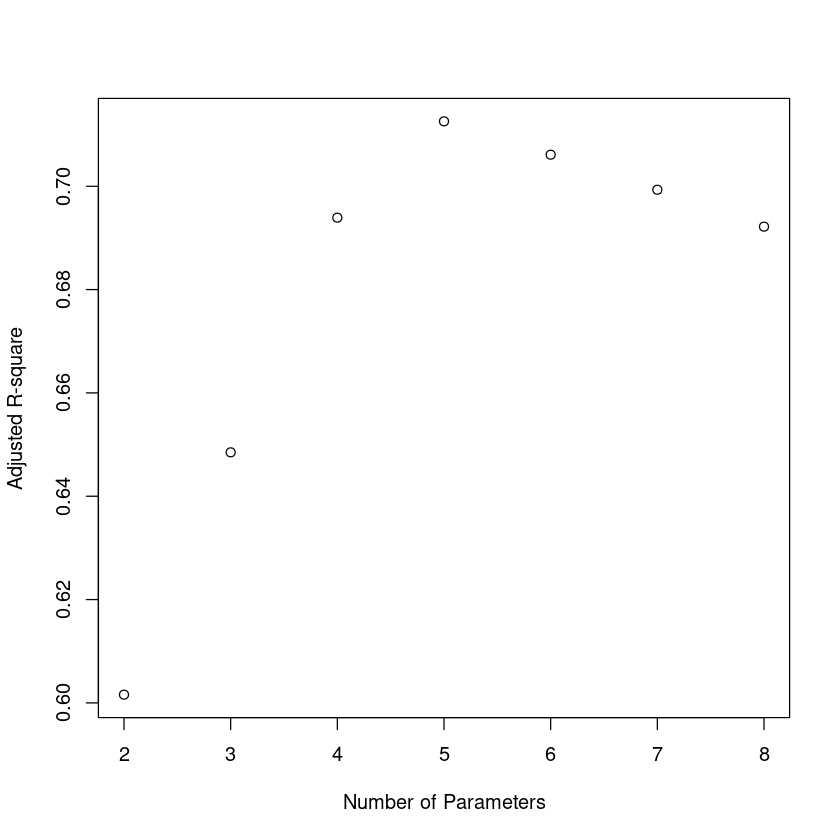

In [13]:
plot(2:8, rs$adjr2, xlab = "Number of Parameters", ylab = "Adjusted R-square")

In [14]:
h = lm.influence(g)$hat
names(h) = state.abb
round(rev(sort(h)),3)

AK    CA    HI    NV    NM    TX    NY    WA    OR    ND    LA    CT    UT 
0.810 0.409 0.379 0.365 0.325 0.284 0.257 0.223 0.222 0.220 0.195 0.194 0.191 
   RI    MD    AL    AZ    MS    FL    IL    PA    NJ    SD    ME    SC    MI 
0.171 0.164 0.161 0.159 0.156 0.149 0.137 0.132 0.130 0.125 0.122 0.118 0.117 
   WY    VT    MA    GA    MO    KY    AR    CO    WV    NC    DE    NH    ID 
0.116 0.115 0.113 0.110 0.110 0.109 0.104 0.103 0.100 0.094 0.093 0.090 0.088 
   OH    MT    MN    TN    WI    VA    OK    IA    NE    KS    IN 
0.088 0.086 0.076 0.070 0.068 0.064 0.063 0.062 0.057 0.055 0.052

In [17]:
# Alaska had very strong leverage
b = regsubsets(Life.Exp ~ ., data = statedata, subset = (state.abb !='AK'))
rs = summary(b)
rs$which[which.max(rs$adjr),]

(Intercept)  Population      Income  Illiteracy      Murder     HS.Grad 
       TRUE        TRUE       FALSE       FALSE        TRUE        TRUE 
      Frost        Area 
       TRUE        TRUE

*  Area was not included in the model

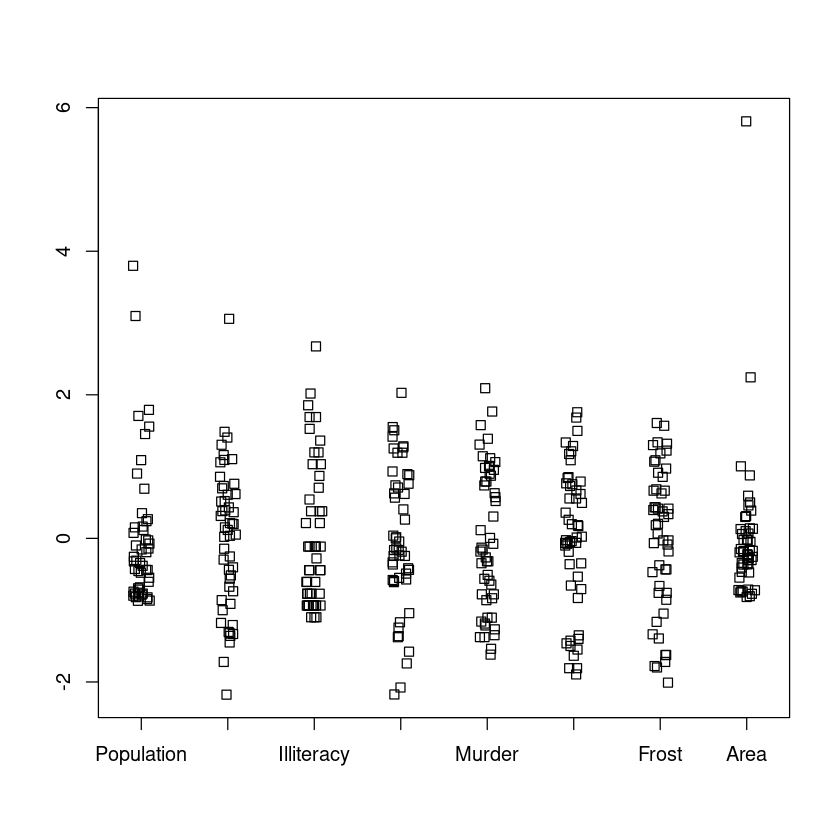

In [18]:
# Population and area are skewed, maybe we should transform them
stripchart(data.frame(scale(statedata)), vertical= TRUE, method='jitter')

In [19]:
rs = summary(b)
rs$which[which.max(rs$adjr), ]

(Intercept)  Population      Income  Illiteracy      Murder     HS.Grad 
       TRUE        TRUE       FALSE       FALSE        TRUE        TRUE 
      Frost        Area 
       TRUE        TRUE

#### Summary

Criterion-based methods typically involve a wider search and compare models in a preferable manner

* How to choose between several similar models
1. Qualitative consequences
2. Predition
3. Cost of predictors
4. Diagnostics